In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from tqdm import tqdm_notebook as tqdm

In [2]:
df1 = pd.read_csv('dataSet1.csv', names=['class', 'feature1', 'feature2'])
df2 = pd.read_csv('dataSet2.csv', names=['class', 'feature1', 'feature2'])
df3 = pd.read_csv('dataSet3.csv', names=['class', 'feature1', 'feature2'])
df4 = pd.read_csv('dataSet4.csv', names=['class', 'feature1', 'feature2'])
set1_X0 = df1[df1['class']==0][['feature1','feature2']].values
set1_X1 = df1[df1['class']==1][['feature1','feature2']].values
set2_X0 = df2[df2['class']==0][['feature1','feature2']].values
set2_X1 = df2[df2['class']==1][['feature1','feature2']].values
set3_X0 = df3[df3['class']==0][['feature1','feature2']].values
set3_X1 = df3[df3['class']==1][['feature1','feature2']].values
set4_X0 = df4[df4['class']==0][['feature1','feature2']].values
set4_X1 = df4[df4['class']==1][['feature1','feature2']].values

In [3]:
def trainLDA(data0, data1):
    mu0 = np.mean(data0,axis=0)
    mu1 = np.mean(data1,axis=0)
    data = np.concatenate(((data0 - mu0),(data1 - mu1)),axis=0)
    cov = np.cov(data.T)
    w = np.dot(np.linalg.inv(cov), mu1-mu0)
    return w

In [4]:
def runLDA(w, X_test):
    lam = np.dot(w, X_test)
    if lam >= 0:
        predict = 1
    else:
        predict = 0
    return lam, predict

In [5]:
def plotLDA(data0, data1):
    data = np.concatenate((data0,data1),axis=0)
    f1_min, f1_max = data[:,0].min() - 3, data[:,0].max() + 3
    f2_min, f2_max = data[:,1].min() - 3, data[:,1].max() + 3
    ff1, ff2 = np.meshgrid(np.arange(f1_min, f1_max, 0.03), np.arange(f2_min, f2_max, 0.03))
    X_test = np.c_[ff1.ravel(), ff2.ravel()]
    w = trainLDA(data0,data1)
    Z = np.array([runLDA(w,test) for test in tqdm(X_test,total=X_test.shape[0],leave=False)])
    Z_contour = Z[:,1]
    Z = Z[:,0]
    Z = Z.reshape(ff1.shape)
    Z_contour = Z_contour.reshape(ff1.shape)
    plt.figure(dpi=200)
    colors = ['peachpuff','khaki','yellowgreen','deepskyblue','slateblue','rebeccapurple']
    cm = LinearSegmentedColormap.from_list('my', colors, N=1000)
    plt.contour(ff1, ff2, Z_contour, colors='gold', linewidths=1)
    plt.pcolormesh(ff1, ff2, Z, cmap=cm)
    plt.colorbar()
    plt.scatter(data0[:,0],data0[:,1],c='b',s=5,label='$H_0$')
    plt.scatter(data1[:,0],data1[:,1],c='orangered',s=5,label='$H_1$')
    plt.legend()
    plt.xlim(f1_min, f1_max)
    plt.ylim(f2_min, f2_max)
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.title("LDA Decision Statistic Surface")
    plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
def plotLogisticRegression(data0, data1):
    data = np.concatenate((data0,data1),axis=0)
    y0 = np.zeros(data0.shape[0])
    y1 = np.ones(data1.shape[0])
    y = np.concatenate((y0,y1))
    f1_min, f1_max = data[:,0].min() - 3, data[:,0].max() + 3
    f2_min, f2_max = data[:,1].min() - 3, data[:,1].max() + 3
    ff1, ff2 = np.meshgrid(np.arange(f1_min, f1_max, 0.03), np.arange(f2_min, f2_max, 0.03))
    X_test = np.c_[ff1.ravel(), ff2.ravel()]
    clf = LogisticRegression(C=1e9, solver='newton-cg').fit(data,y)
    Z = clf.predict_proba(X_test)[:,1]
    Z_contour = clf.predict(X_test)
    Z = Z.reshape(ff1.shape)
    Z_contour = Z_contour.reshape(ff1.shape)
    plt.figure(dpi=200)
    colors = ['peachpuff','khaki','yellowgreen','deepskyblue','slateblue','rebeccapurple']
    cm = LinearSegmentedColormap.from_list('my', colors, N=1000)
    plt.contour(ff1, ff2, Z_contour, colors='gold', linewidths=1)
    plt.pcolormesh(ff1, ff2, Z, cmap=cm)
    plt.colorbar()
    plt.scatter(data0[:,0],data0[:,1],c='b',s=5,label='$H_0$')
    plt.scatter(data1[:,0],data1[:,1],c='orangered',s=5,label='$H_1$')
    plt.legend()
    plt.xlim(f1_min, f1_max)
    plt.ylim(f2_min, f2_max)
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.title("Logistic Discriminant Decision Statistic Surface")
    plt.show()

In [7]:
'''
mode1: the features may be dependent, and the covariance matrices are unique
mode2: features are independent but the covariance matrices under each class are unique
mode3: the covariance matrices under both classes are the same but the features may be dependent
mode4: covariance matrices under both classes are the same and the features are independent
'''
def trainBayesClassifier(data0, data1, mode):
    if mode=='ONE':
        mu0_hat = np.mean(data0,axis=0)
        mu1_hat = np.mean(data1,axis=0)
        cov0_hat = np.cov(data0.T)
        cov1_hat = np.cov(data1.T)
    if mode=='TWO':
        mu0_hat = np.mean(data0,axis=0)
        mu1_hat = np.mean(data1,axis=0)
        cov0_hat = np.array([[np.var(data0[:,0]),0],[0,np.var(data0[:,1])]])
        cov1_hat = np.array([[np.var(data1[:,0]),0],[0,np.var(data1[:,1])]])
    if mode=='THREE':
        mu0_hat = np.mean(data0,axis=0)
        mu1_hat = np.mean(data1,axis=0)
        data = np.concatenate(((data0 - mu0_hat),(data1 - mu1_hat)),axis=0)
        cov0_hat = np.cov(data.T)
        cov1_hat = np.cov(data.T)
    if mode=='FOUR':
        mu0_hat = np.mean(data0,axis=0)
        mu1_hat = np.mean(data1,axis=0)
        data = np.concatenate(((data0 - mu0_hat),(data1 - mu1_hat)),axis=0)
        cov0_hat = np.array([[np.var(data[:,0]),0],[0,np.var(data[:,1])]])
        cov1_hat = np.array([[np.var(data[:,0]),0],[0,np.var(data[:,1])]])
    W_0 = -1 / 2 * np.linalg.inv(cov0_hat)
    W_1 = -1 / 2 * np.linalg.inv(cov1_hat)
    w_0 = np.dot(np.linalg.inv(cov0_hat),mu0_hat)
    w_1 = np.dot(np.linalg.inv(cov1_hat),mu1_hat)
    w_00 = -1 / 2 * np.dot(np.dot(mu0_hat,np.linalg.inv(cov0_hat)),mu0_hat) - 1 / 2 * np.log(np.linalg.det(cov0_hat))
    w_10 = -1 / 2 * np.dot(np.dot(mu1_hat,np.linalg.inv(cov1_hat)),mu1_hat) - 1 / 2 * np.log(np.linalg.det(cov1_hat))
    return W_0, W_1, w_0, w_1, w_00, w_10

In [8]:
def runBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, x_test):
    g0 = np.dot(np.dot(x_test,W_0),x_test) + np.dot(w_0,x_test) + w_00
    g1 = np.dot(np.dot(x_test,W_1),x_test) + np.dot(w_1,x_test) + w_10
    g = g1 - g0
    return g

def predictBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, x_test):
    g0 = np.dot(np.dot(x_test,W_0),x_test) + np.dot(w_0,x_test) + w_00
    g1 = np.dot(np.dot(x_test,W_1),x_test) + np.dot(w_1,x_test) + w_10
    g = g1 - g0
    if g>= 0:
        predict = 1
    else:
        predict = 0
    return predict

In [9]:
def plotBayesStatisticSurface(data0, data1, mode):
    data = np.concatenate((data0,data1),axis=0)
    f1_min, f1_max = data[:,0].min() - 3, data[:,0].max() + 3
    f2_min, f2_max = data[:,1].min() - 3, data[:,1].max() + 3
    ff1, ff2 = np.meshgrid(np.arange(f1_min, f1_max, 0.03), np.arange(f2_min, f2_max, 0.03))
    X_test = np.c_[ff1.ravel(), ff2.ravel()]
    W_0, W_1, w_0, w_1, w_00, w_10 = trainBayesClassifier(data0, data1, mode)
    Z = np.array([runBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, x_test) for x_test in X_test])
    Z = Z.reshape(ff1.shape)
    Z_contour = np.array([predictBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, x_test) for x_test in X_test])
    Z_contour = Z_contour.reshape(ff1.shape)
    plt.figure(dpi=200)
    colors = ['peachpuff','khaki','yellowgreen','deepskyblue','slateblue','rebeccapurple']
    cm = LinearSegmentedColormap.from_list('my', colors, N=1000)
    plt.contour(ff1, ff2, Z_contour, colors='gold', linewidths=1)
    plt.pcolormesh(ff1, ff2, Z, cmap=cm)
    plt.colorbar()
    plt.scatter(data0[:,0],data0[:,1],c='b',s=5,label='$H_0$')
    plt.scatter(data1[:,0],data1[:,1],c='orangered',s=5,label='$H_1$')
    plt.legend()
    plt.xlim(f1_min, f1_max)
    plt.ylim(f2_min, f2_max)
    plt.title("Bayes Classifier Decision Statistic Surface")
    plt.show()

In [18]:
def plotBoundaries(data0, data1, mode):
    data = np.concatenate((data0,data1),axis=0)
    y0 = np.zeros(data0.shape[0])
    y1 = np.ones(data1.shape[0])
    y = np.concatenate((y0,y1))
    f1_min, f1_max = data[:,0].min() - 3, data[:,0].max() + 3
    f2_min, f2_max = data[:,1].min() - 3, data[:,1].max() + 3
    ff1, ff2 = np.meshgrid(np.arange(f1_min, f1_max, 0.03), np.arange(f2_min, f2_max, 0.03))
    X_test = np.c_[ff1.ravel(), ff2.ravel()]
    w = trainLDA(data0,data1)
    Z_LDA = np.array([runLDA(w,test) for test in tqdm(X_test,total=X_test.shape[0],leave=False)])
    Z_LDA = Z_LDA[:,1]
    Z_LDA = Z_LDA.reshape(ff1.shape)
    clf = LogisticRegression(C=1e9, solver='newton-cg').fit(data,y)
    Z_lr = clf.predict(X_test)
    Z_lr = Z_lr.reshape(ff1.shape)
    W_0, W_1, w_0, w_1, w_00, w_10 = trainBayesClassifier(data0, data1, mode)
    Z_bayes = np.array([predictBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, x_test) for x_test in X_test])
    Z_bayes = Z_bayes.reshape(ff1.shape)
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(111)
    cntr1 = ax.contour(ff1, ff2, Z_LDA, linewidths=1, colors='orange')
    cntr2 = ax.contour(ff1, ff2, Z_lr, linewidths=1, colors='m')
    cntr3 = ax.contour(ff1, ff2, Z_bayes, linewidths=1, colors='g')
    h1,_ = cntr1.legend_elements()
    h2,_ = cntr2.legend_elements()
    h3,_ = cntr3.legend_elements()
    plt.scatter(data0[:,0],data0[:,1],c='b',s=5,label='$H_0$')
    plt.scatter(data1[:,0],data1[:,1],c='orangered',s=5,label='$H_1$')
    ax.legend([h1[0], h2[0], h3[0]], ['LDA', 'Logistic', 'Bayes'])
    plt.xlim(f1_min, f1_max)
    plt.ylim(f2_min, f2_max)
    plt.title("Decision Boundaries")
    plt.show()

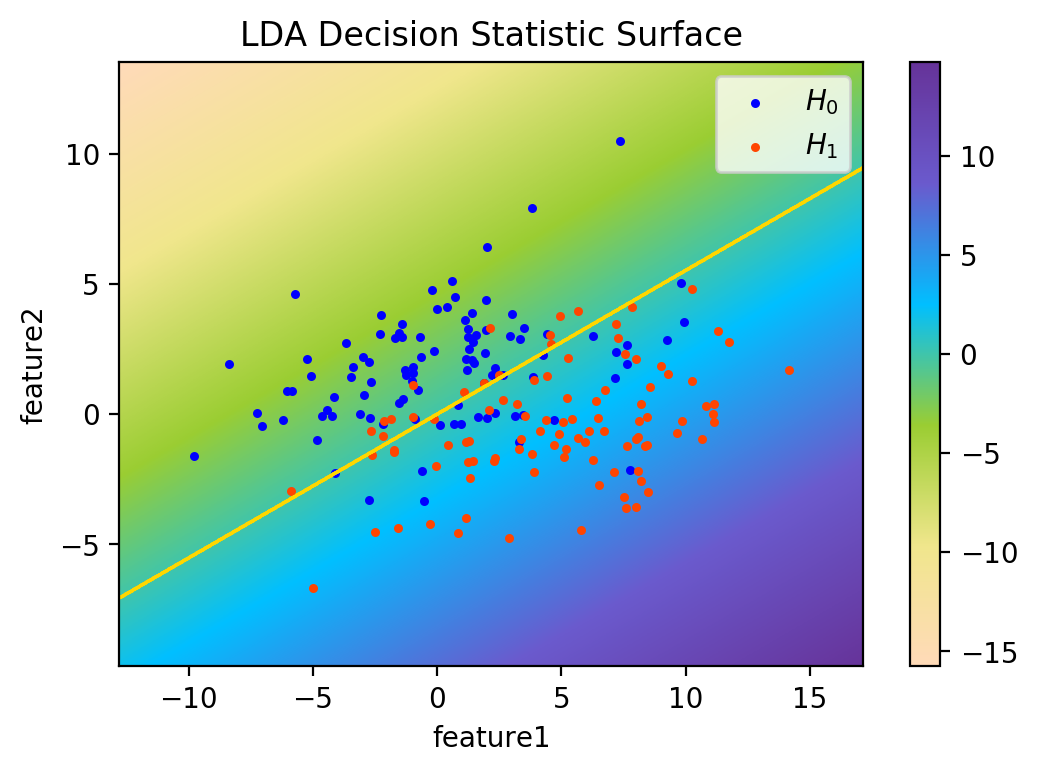

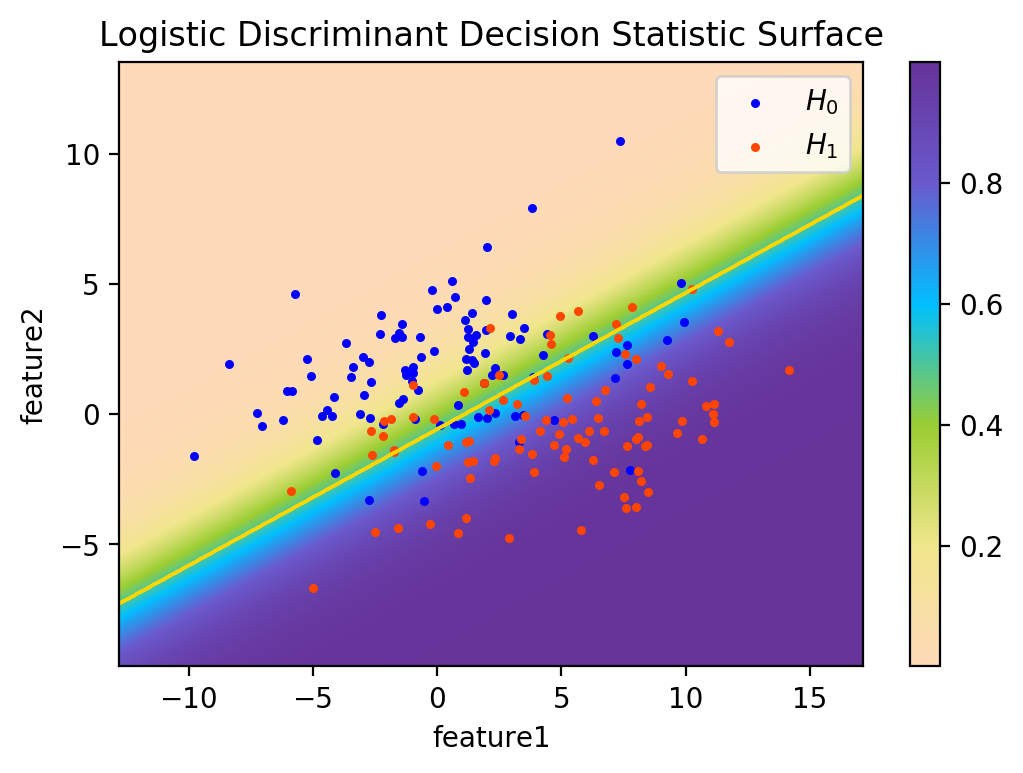

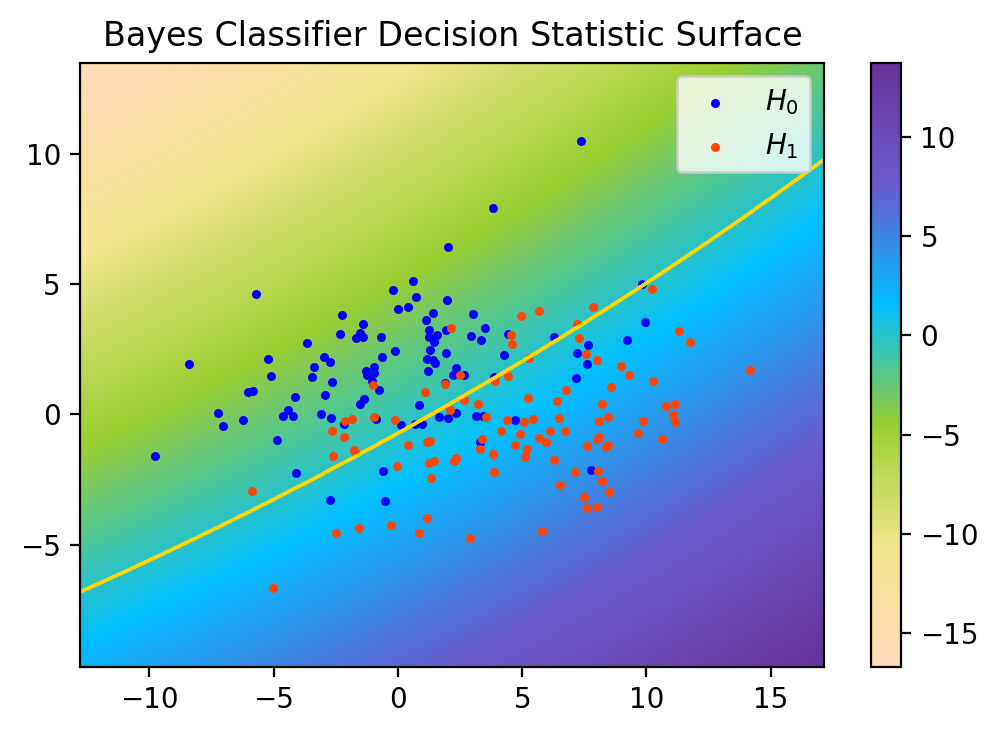

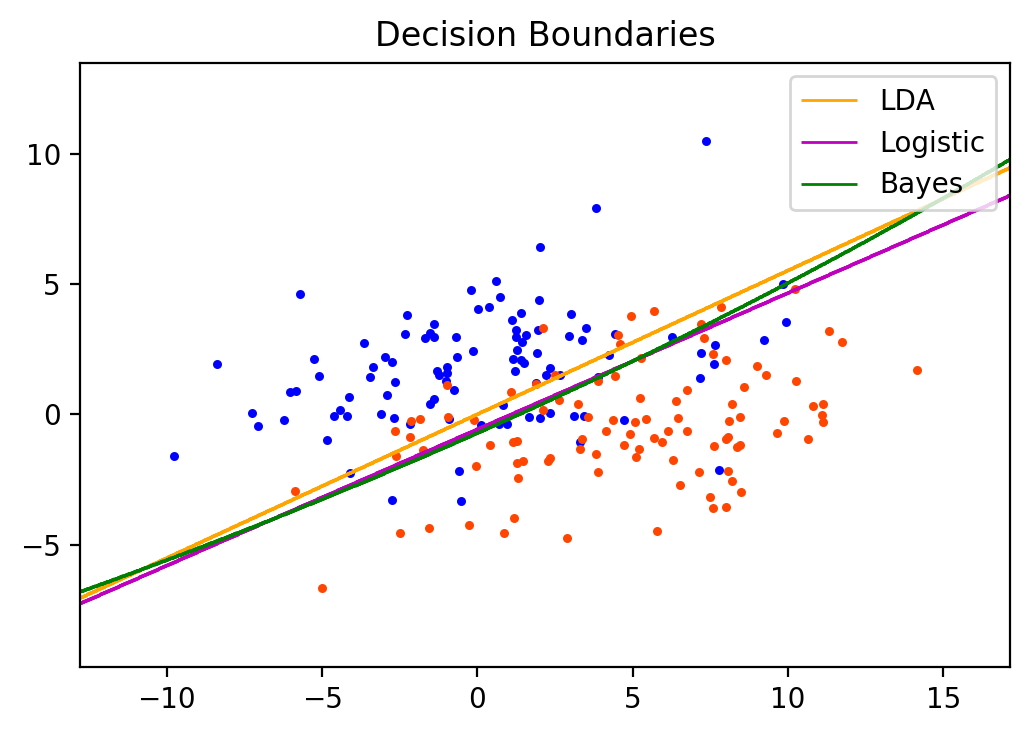

In [19]:
plotLDA(set1_X0, set1_X1)
plotLogisticRegression(set1_X0,set1_X1)
plotBayesStatisticSurface(set1_X0, set1_X1, 'ONE')
plotBoundaries(set1_X0, set1_X1, 'ONE')

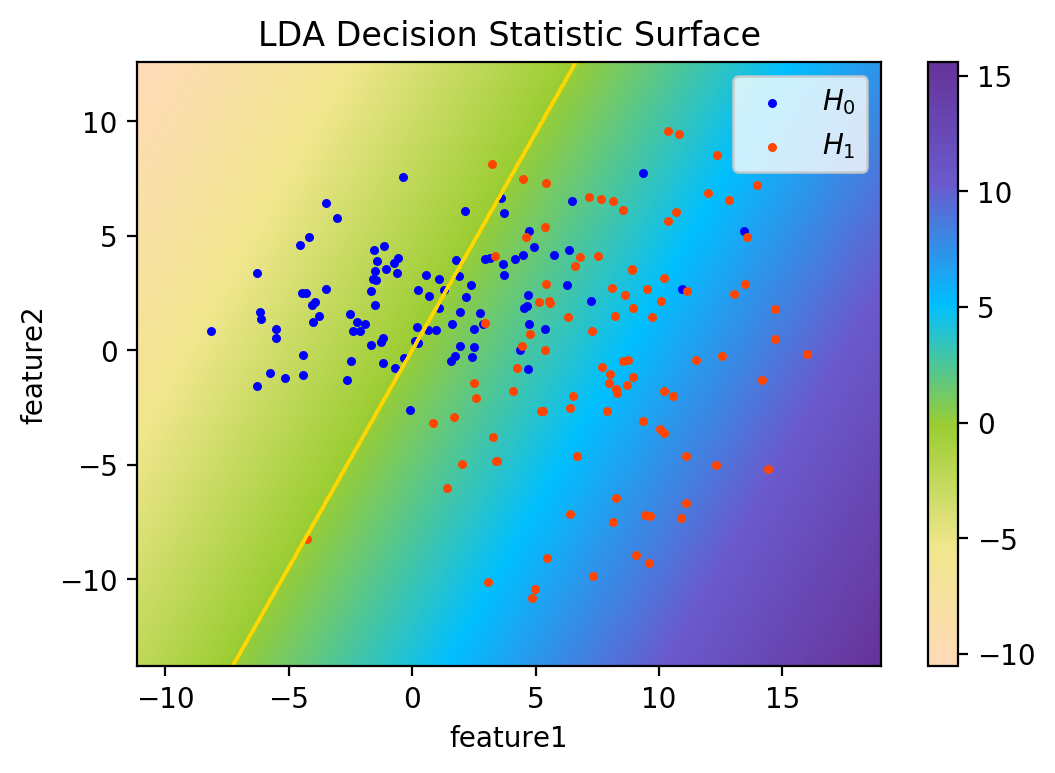

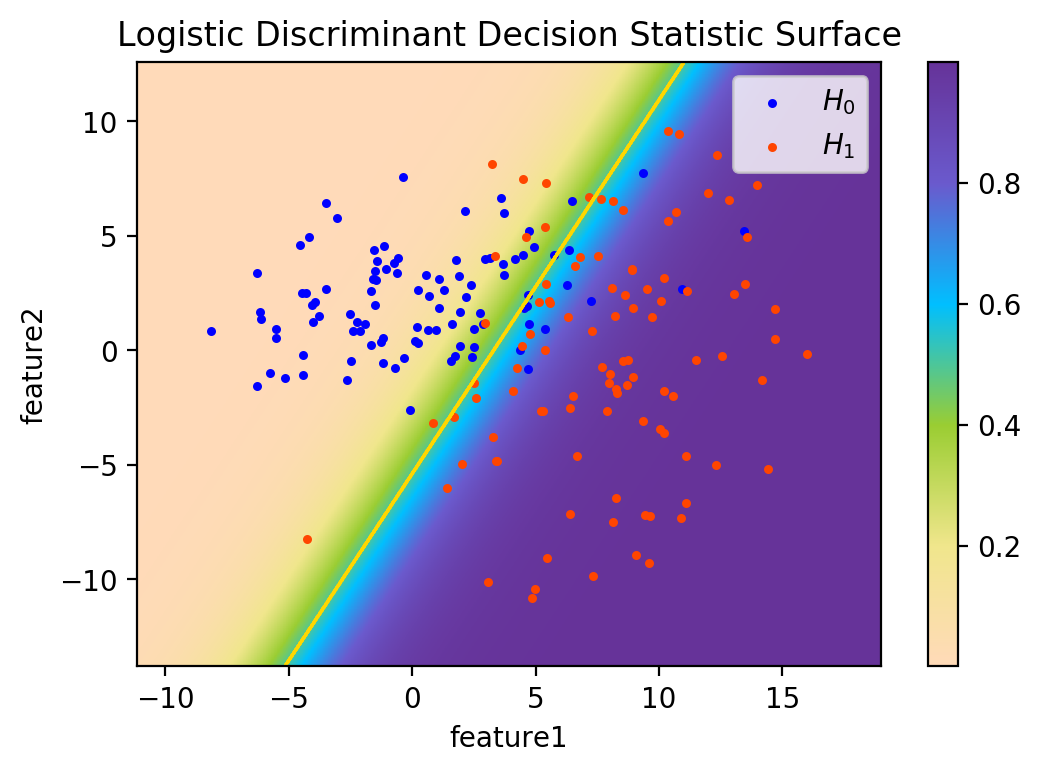

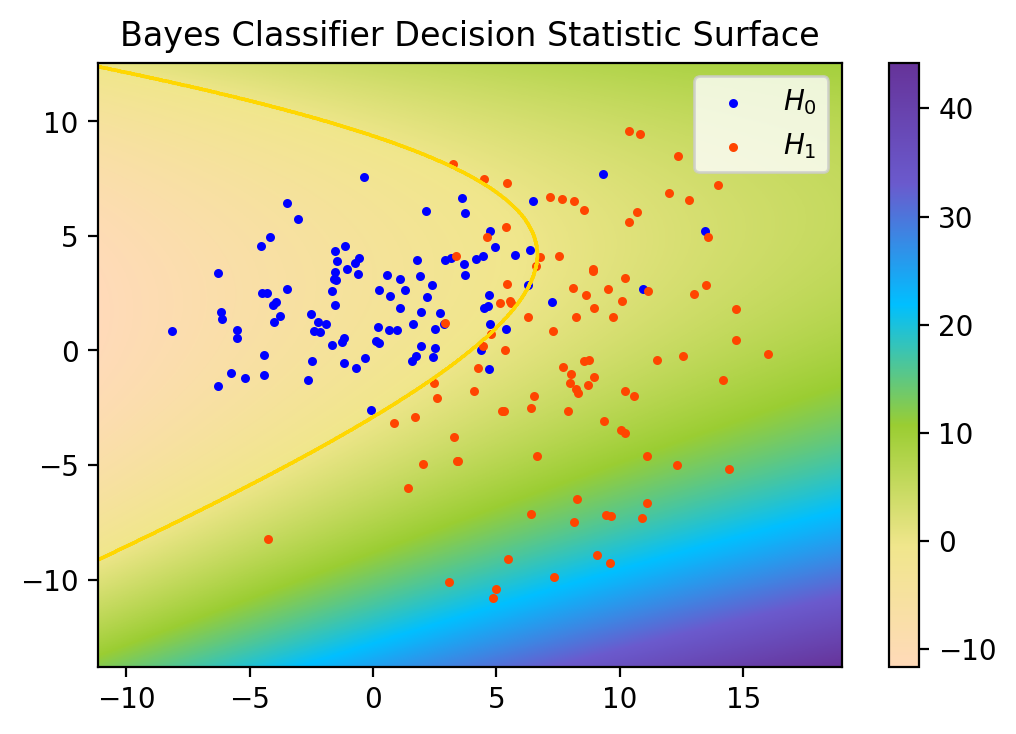

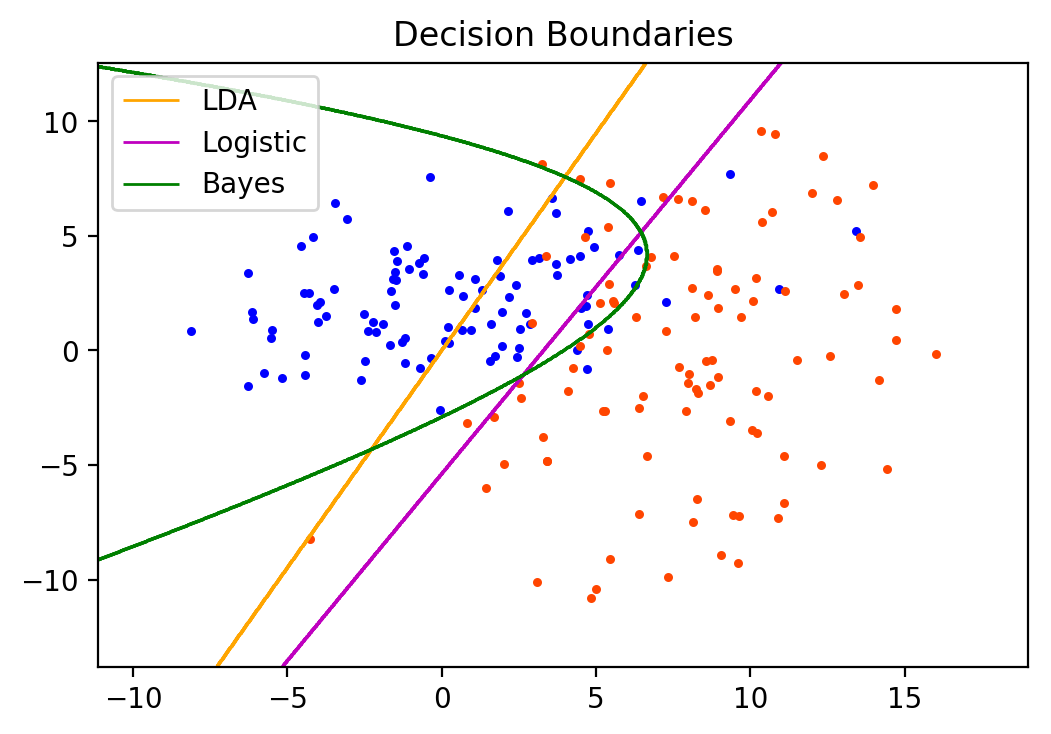

In [20]:
plotLDA(set2_X0, set2_X1)
plotLogisticRegression(set2_X0,set2_X1)
plotBayesStatisticSurface(set2_X0, set2_X1, 'ONE')
plotBoundaries(set2_X0, set2_X1, 'ONE')

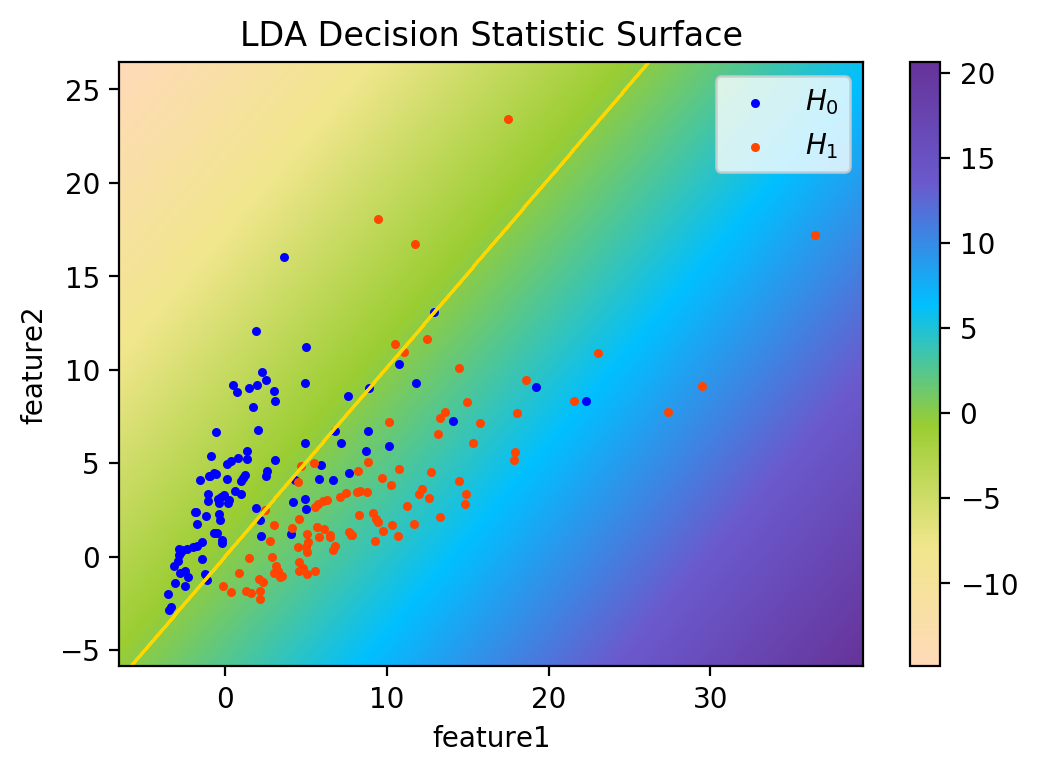

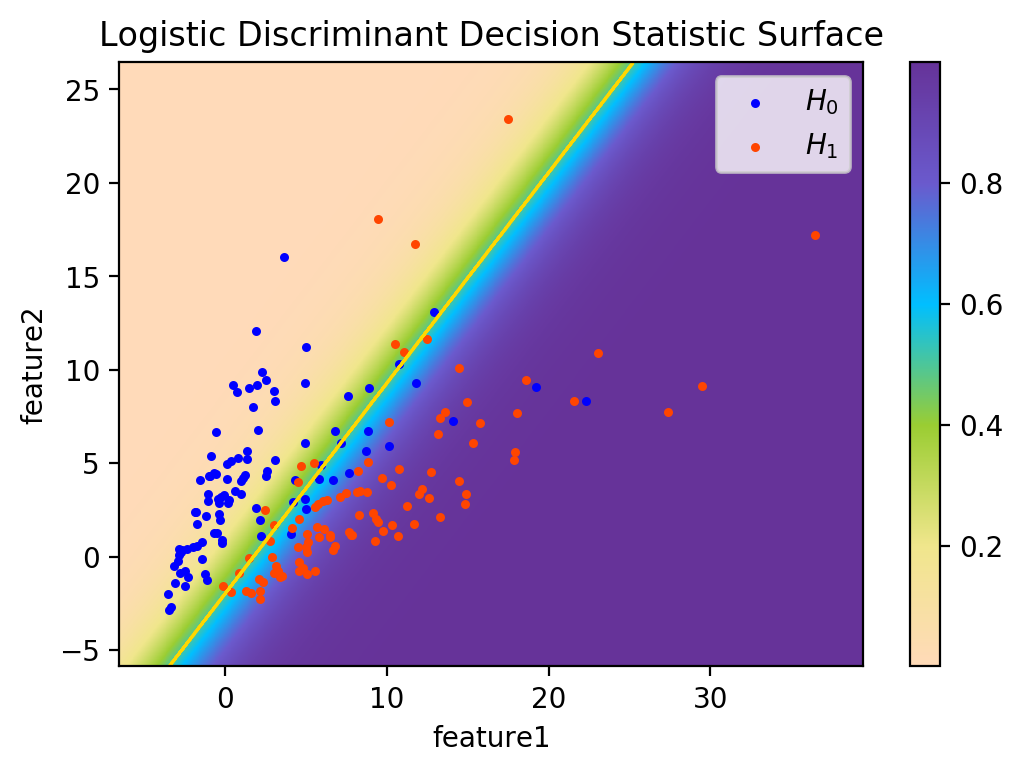

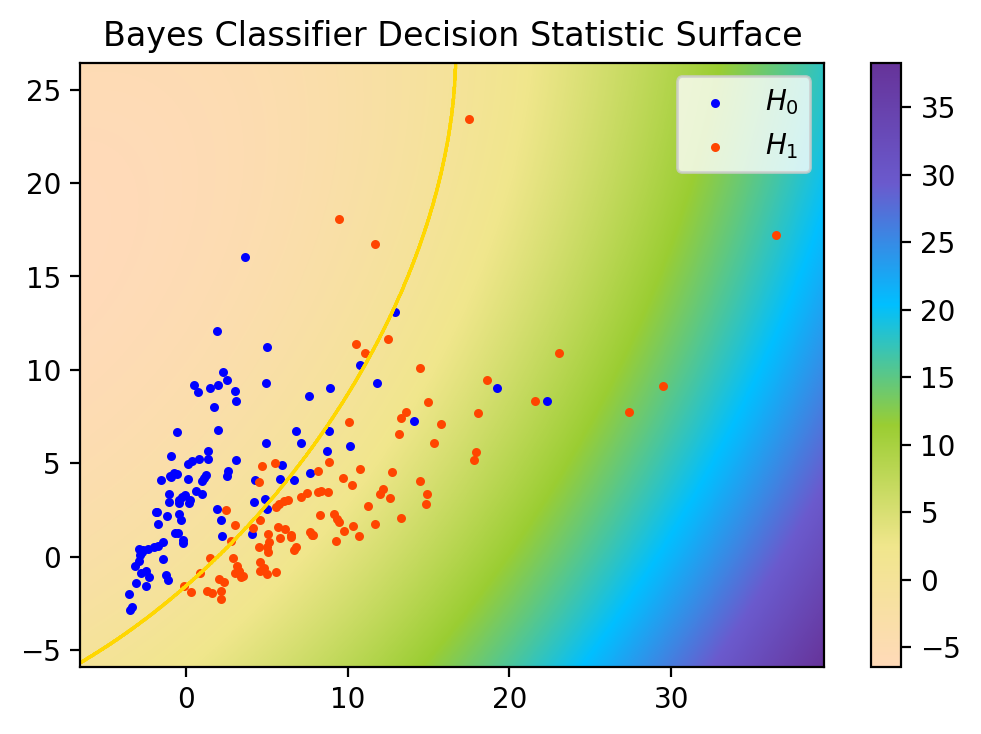

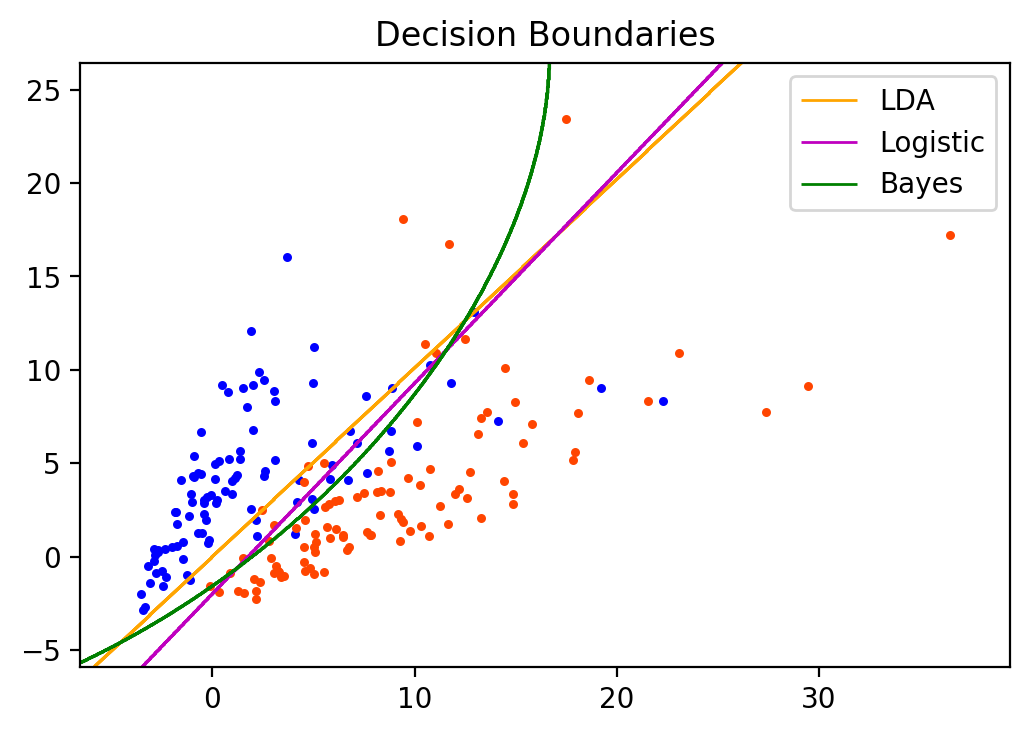

In [21]:
plotLDA(set3_X0, set3_X1)
plotLogisticRegression(set3_X0,set3_X1)
plotBayesStatisticSurface(set3_X0, set3_X1, 'ONE')
plotBoundaries(set3_X0, set3_X1, 'ONE')

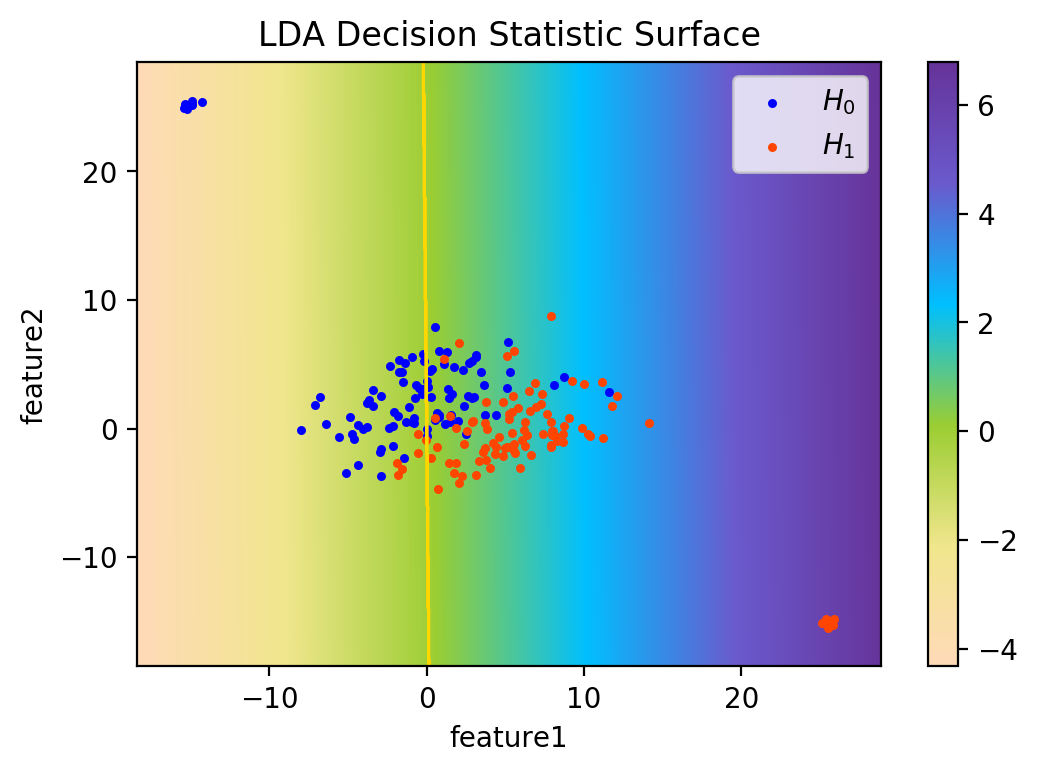

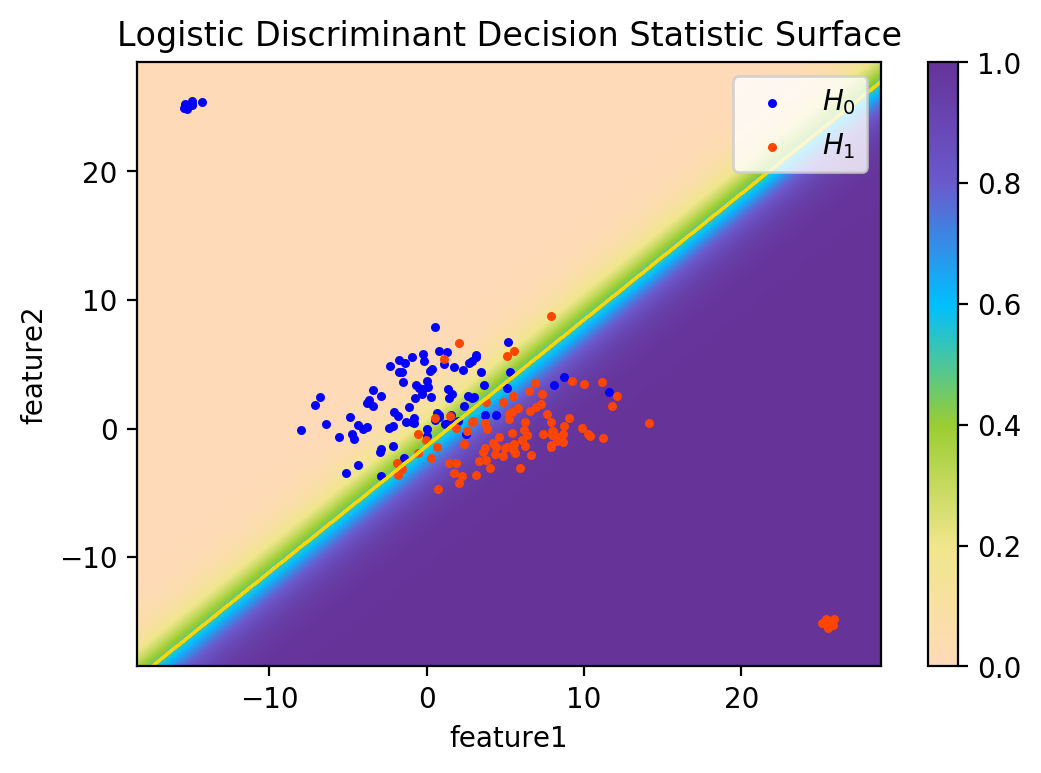

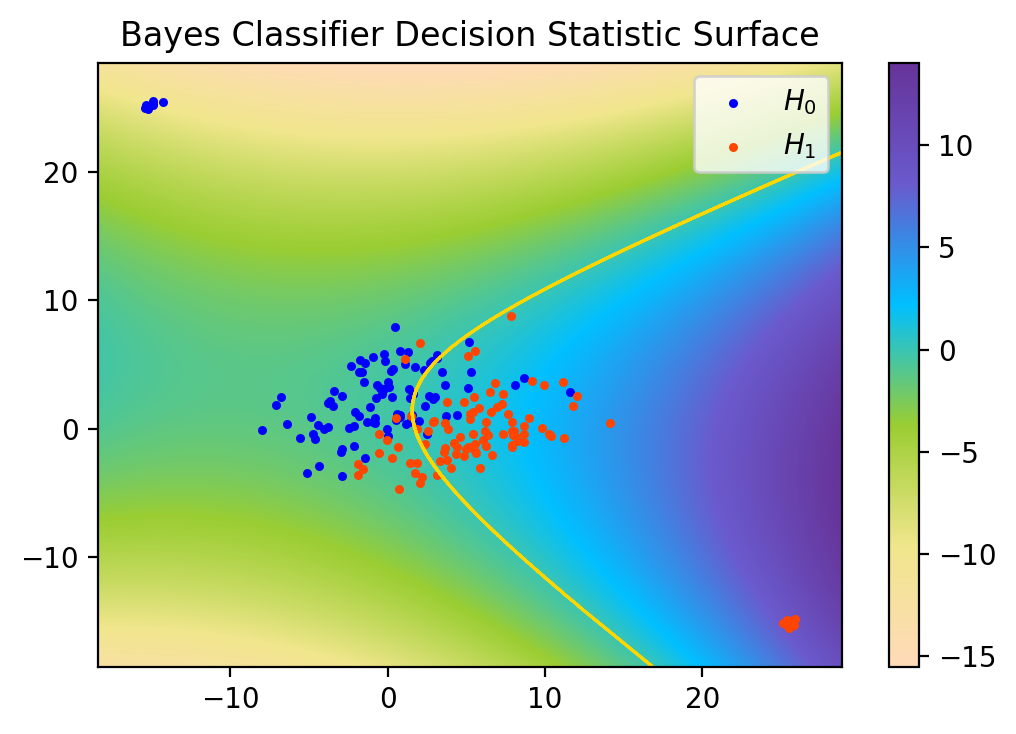

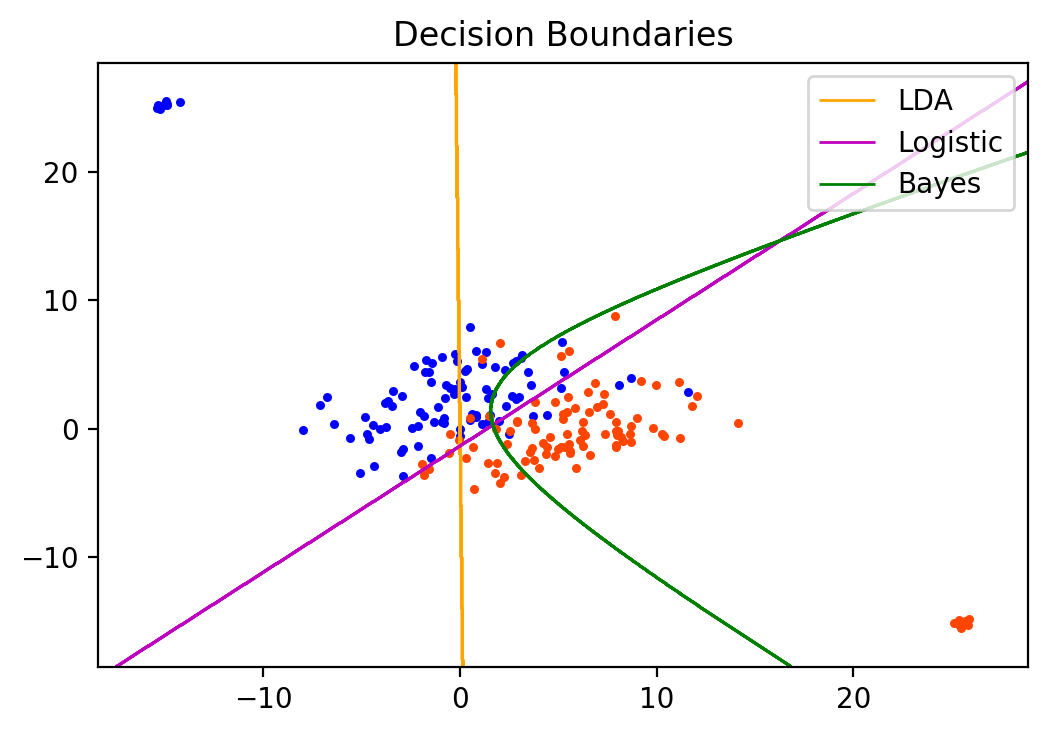

In [22]:
plotLDA(set4_X0, set4_X1)
plotLogisticRegression(set4_X0,set4_X1)
plotBayesStatisticSurface(set4_X0, set4_X1, 'ONE')
plotBoundaries(set4_X0, set4_X1, 'ONE')